<a href="https://colab.research.google.com/github/NidhiChaurasia/Data-Science-Projects/blob/main/Heart_Attack_Prediction_Using_KNN(K_Nearest_Neighbors).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#https://www.kaggle.com/nareshbhat/health-care-data-set-on-heart-attack-possibility#
#This is the required dataset

In [1]:
# Step 1: Load the data
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [2]:
#About data set
#This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
#this date.The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no/less chance of heart attack and 1 = more chance of heart attack

# Attribute Information
# 1) age
# 2) sex
# 3) chest pain type (4 values)
# 4) resting blood pressure
# 5) serum cholestoral in mg/dl
# 6)fasting blood sugar > 120 mg/dl
# 7) resting electrocardiographic results (values 0,1,2)
# 8) maximum heart rate achieved
# 9) exercise induced angina
# 10) oldpeak = ST depression induced by exercise relative to rest
# 11)the slope of the peak exercise ST segment
# 12) number of major vessels (0-3) colored by flourosopy
# 13) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
# 14) target: 0= less chance of heart attack 1= more chance of heart attack

# Dataset is taken for learning purpose. Source of the data : https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [6]:
import numpy as np
import pandas as pd

%matplotlib inline
import seaborn as sns #Seaborn is a python data visualization library based on matplotlib.It provides a high-level interface for drawing attractive and informative statistical graphics.

%config InlineBackend.figure_format = 'retina' #make your graphs and charts look sharper
sns.set()  #start seaborn engine

In [7]:
df = pd.read_csv("heart.csv")

In [8]:
# Step 2:Explore the data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
# Step 3 : Exploratory Data Analysis
sns.set(rc = {'figure.figsize':(12,10)})
sns.set_context("talk" , font_scale=0.5)

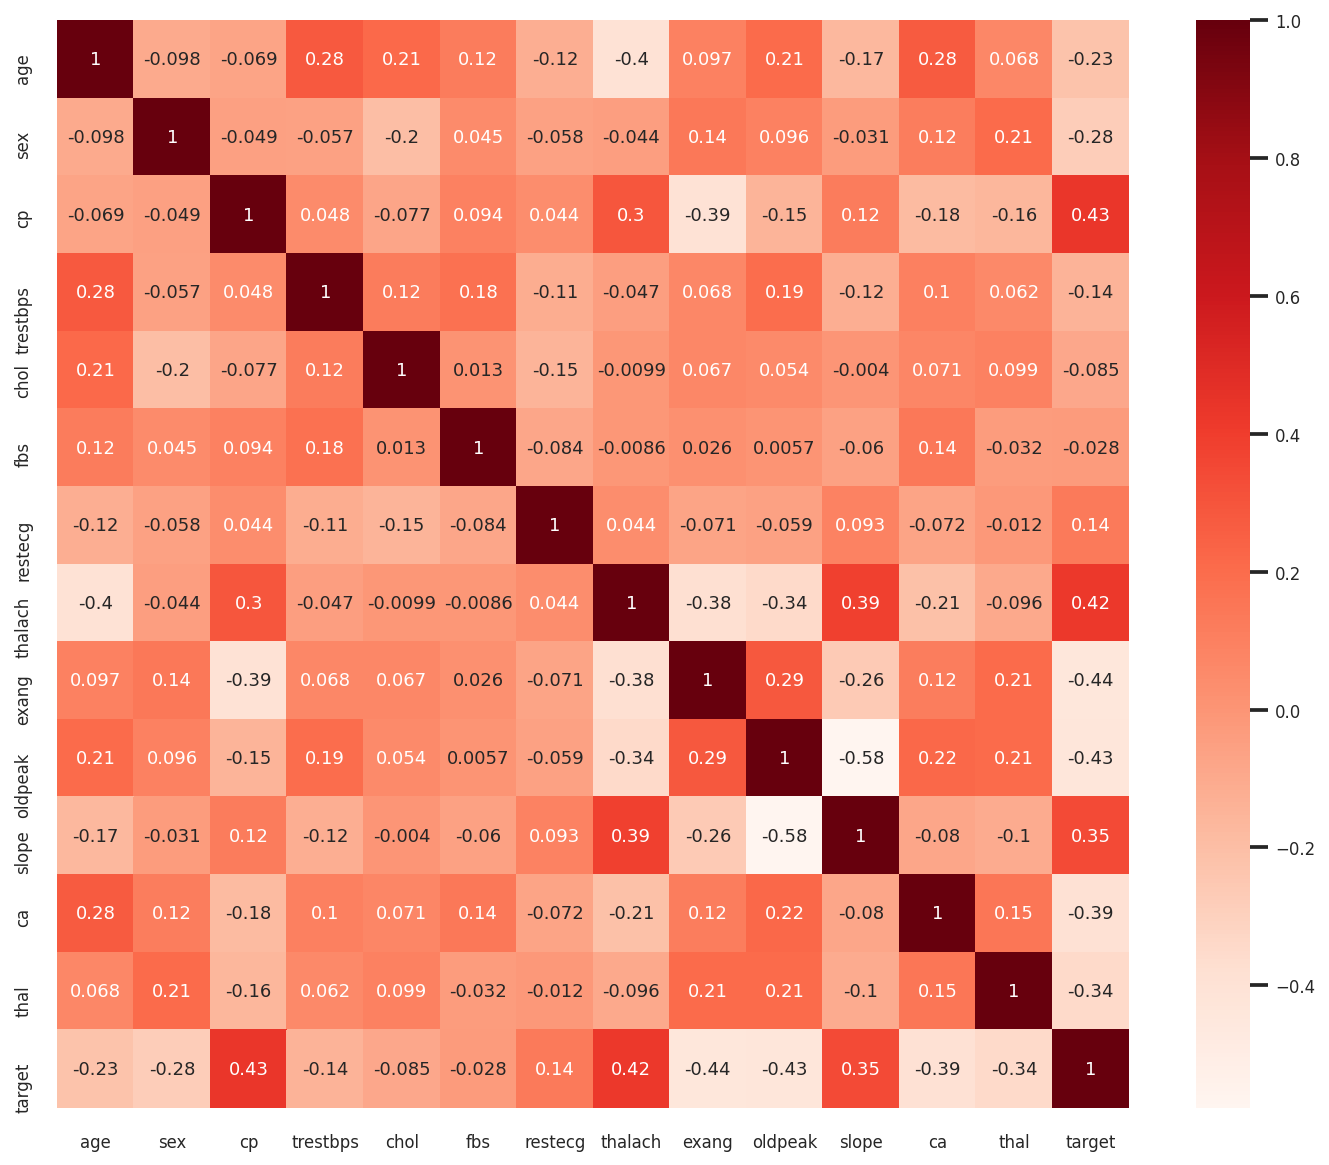

In [12]:
sns.heatmap(df.corr(),cmap="Reds" , annot=True)

In [13]:
# Step 4: Train the model
import sklearn
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split

In [14]:
a = df.drop("target",axis=1)
a = preprocessing.scale(a)
b = df['target']


In [15]:
a_train,a_test,b_train,b_test = train_test_split(a,b,test_size=0.3)

In [17]:
clf = neighbors.KNeighborsClassifier()
clf.fit(a_train,b_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [18]:
accuracy = clf.score(a_train,b_train)
print("Accuracy",accuracy)

Accuracy 0.8962264150943396


In [19]:
# Step 5: Prediction
for a,b in zip(a_test,b_test):
  print(f"Predicted Target:{clf.predict([a])[0]}, Actual Target: (y)")

Predicted Target:0, Actual Target: (y)
Predicted Target:1, Actual Target: (y)
Predicted Target:1, Actual Target: (y)
Predicted Target:0, Actual Target: (y)
Predicted Target:0, Actual Target: (y)
Predicted Target:0, Actual Target: (y)
Predicted Target:0, Actual Target: (y)
Predicted Target:1, Actual Target: (y)
Predicted Target:0, Actual Target: (y)
Predicted Target:1, Actual Target: (y)
Predicted Target:1, Actual Target: (y)
Predicted Target:1, Actual Target: (y)
Predicted Target:0, Actual Target: (y)
Predicted Target:0, Actual Target: (y)
Predicted Target:0, Actual Target: (y)
Predicted Target:0, Actual Target: (y)
Predicted Target:1, Actual Target: (y)
Predicted Target:1, Actual Target: (y)
Predicted Target:1, Actual Target: (y)
Predicted Target:1, Actual Target: (y)
Predicted Target:0, Actual Target: (y)
Predicted Target:1, Actual Target: (y)
Predicted Target:0, Actual Target: (y)
Predicted Target:0, Actual Target: (y)
Predicted Target:1, Actual Target: (y)
Predicted Target:1, Actua

In [20]:
# Bonus: SVM for classification
from sklearn import svm
clf2 = svm.SVC(kernel="linear")
clf2.fit(a_train,b_train)
confidence2=clf2.score(a_train,b_train)
print("Accuracy",confidence2)

Accuracy 0.8537735849056604


In [22]:
for a,b in zip(a_test,b_test):
  print(f"Mode1:{clf2.predict([a])[0]}, Actual: {b}")

Mode1:0, Actual: 0
Mode1:1, Actual: 0
Mode1:1, Actual: 1
Mode1:0, Actual: 0
Mode1:0, Actual: 0
Mode1:0, Actual: 0
Mode1:1, Actual: 1
Mode1:1, Actual: 1
Mode1:0, Actual: 0
Mode1:1, Actual: 1
Mode1:0, Actual: 0
Mode1:1, Actual: 1
Mode1:0, Actual: 0
Mode1:0, Actual: 0
Mode1:0, Actual: 0
Mode1:0, Actual: 0
Mode1:1, Actual: 1
Mode1:1, Actual: 0
Mode1:1, Actual: 1
Mode1:1, Actual: 1
Mode1:0, Actual: 0
Mode1:1, Actual: 1
Mode1:0, Actual: 0
Mode1:0, Actual: 0
Mode1:1, Actual: 1
Mode1:1, Actual: 0
Mode1:0, Actual: 0
Mode1:1, Actual: 0
Mode1:1, Actual: 1
Mode1:1, Actual: 1
Mode1:0, Actual: 0
Mode1:0, Actual: 0
Mode1:1, Actual: 1
Mode1:0, Actual: 1
Mode1:1, Actual: 1
Mode1:1, Actual: 1
Mode1:0, Actual: 0
Mode1:0, Actual: 0
Mode1:1, Actual: 1
Mode1:0, Actual: 0
Mode1:1, Actual: 1
Mode1:0, Actual: 0
Mode1:1, Actual: 1
Mode1:0, Actual: 1
Mode1:0, Actual: 0
Mode1:0, Actual: 0
Mode1:1, Actual: 1
Mode1:0, Actual: 0
Mode1:1, Actual: 1
Mode1:0, Actual: 0
Mode1:1, Actual: 1
Mode1:1, Actual: 1
Mode1:0, Act